MSE: 10183.356222788492, SSIM: 0.7592975317875994


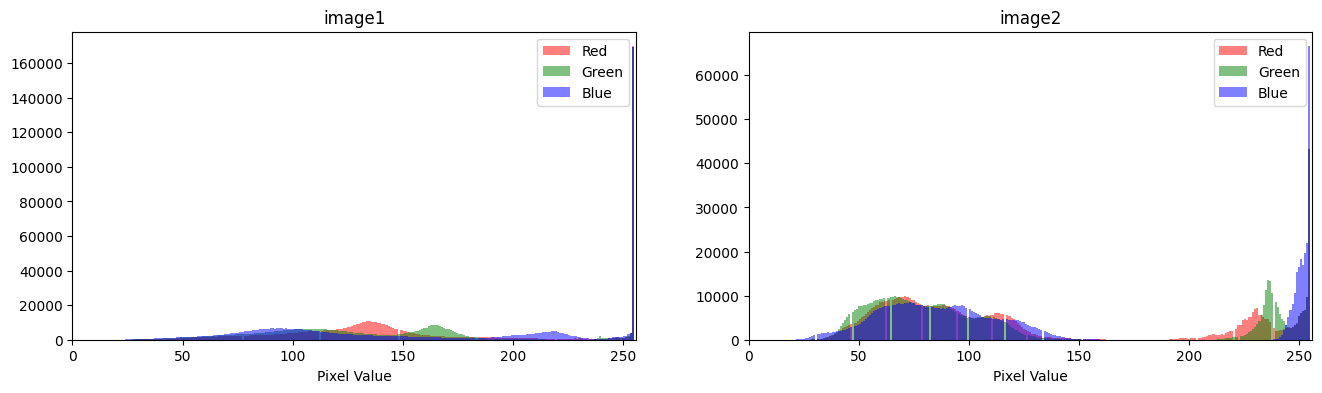

In [7]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from typing import Tuple
from matplotlib import pyplot as plt
from PIL import Image

def plot_histograms(image_paths, titles):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(16, 4))

    for idx, (image_path, title) in enumerate(zip(image_paths, titles)):
        image = Image.open(image_path).convert('RGB')
        image_pixels = image.getdata()

        r_channel = [pixel[0] for pixel in image_pixels]
        g_channel = [pixel[1] for pixel in image_pixels]
        b_channel = [pixel[2] for pixel in image_pixels]

        axes[idx].hist(r_channel, bins=256, color='red', alpha=0.5, label='Red')
        axes[idx].hist(g_channel, bins=256, color='green', alpha=0.5, label='Green')
        axes[idx].hist(b_channel, bins=256, color='blue', alpha=0.5, label='Blue')
        axes[idx].set_title(title)
        axes[idx].set_xlabel('Pixel Value')
        axes[idx].set_xlim([0, 256])
        axes[idx].legend()

    plt.show()

def mse(imageA: np.ndarray, imageB: np.ndarray) -> float:
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def compare_images(imageA: np.ndarray, imageB: np.ndarray) -> Tuple[float, float]:
    m = mse(imageA, imageB)
    win_size = min(imageA.shape[0], imageA.shape[1], imageB.shape[0], imageB.shape[1])
    win_size = max(win_size, 1)
    if win_size % 2 == 0:
        win_size -= 1
    s = ssim(imageA, imageB, win_size=win_size, multichannel=True, channel_axis=2)
    return m, s

if __name__ == "__main__":
    image1_path = 'filtered_1/00000000_(4).jpg'
    image2_path = 'filtered_1/00000007_(4).jpg'

    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    image_path = [image1_path, image2_path]
    titles = ['image1', 'image2']
    mse_value, ssim_value = compare_images(image1, image2)
    print(f"MSE: {mse_value}, SSIM: {ssim_value}")
    plot_histograms(image_path, titles)